<a href="https://colab.research.google.com/github/Ankush11-hash/simple-_project/blob/master/HR_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imoort required for the salary prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error # calculating the error on predicting side

In [62]:
#Loading the data set
df = pd.read_csv('https://raw.githubusercontent.com/payutech/salary/master/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [79]:
df.shape

(30, 2)

In [80]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Ploting the data and try to find the relation between the feature and the Label**


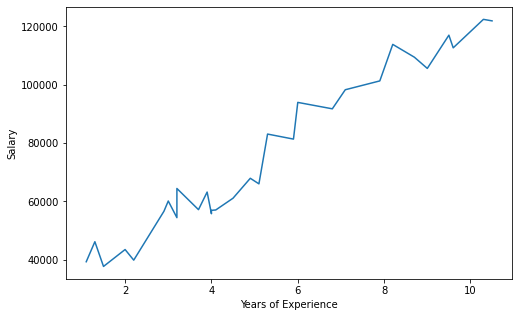

In [130]:
df_p = df # making a copy of df
%matplotlib inline
plt.figure(figsize=(8,5))
plt.plot(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()



The relation could be clearly seen as positive corelation between the features and the label ,therefore **Linear regression** would be ideal fit for the data available



In [0]:
np.random.seed(1)
df_p = np.random.permutation(df_p)
X_train = df_p[:,:1]
y_train = df_p[:,-1:]

from sklearn.model_selection import train_test_split
X = df[['YearsExperience']]
y= df['Salary']
X_tr,X_te,y_tr,y_te  = train_test_split(X,y,test_size=.20,random_state=0)# taking 20% data as test data

In [146]:
lr = LinearRegression()
lr.fit(X_tr,y_tr)
score_lr= lr.score(X_tr,y_tr)
yhat = lr.predict(X_te) 
print('Score = ',score_lr)
mse = np.sqrt(mean_squared_error(yhat,y_te))
mse

Score =  0.9411949620562126


3580.979237321343

**Insight**

we receive a fit_side **score of 94%** and a mse of  **Rs 3580.97**

this clearly means that this model predict the salary of candidate with error of **Rs 3580.97**.

In [127]:
X_test = [[float(input('Enter the years of experience of the candidate ? =>'))]]
y_pred = lr.predict(X_test)
print('The salary of Rs {} is suited for {} years of experience and could be altered with addition or subtraction of Rs {}'.format(np.round(y_pred[0],2),X_test[0][0],np.round(mse,2)))#49417.11

Enter the years of experience of the candidate ? => 2.5
The salary of Rs 50061.54 is suited for 2.5 years of experience and could be altered with additionor subtraction of Rs 3580.98


**The salary of Rs 50061.54 is suited for 2.5 years of experience and could be altered with additionor subtraction of Rs 3580.98**

In [147]:
rnd = RandomForestRegressor(random_state=0)
# problem is not that complex therefore we will not use hyperparameters to train the model
rnd.fit(X_tr,y_tr)
score_rnd = rnd.score(X_tr,y_tr)
print('Score = ', score_rnd)
yhat = rnd.predict(X_te)
mse_rnd= np.sqrt(mean_squared_error(yhat,y_te))
print('mse_rnd = ',mse_rnd)

Score =  0.9865291759929378
mse_rnd =  4714.18528745171


In [145]:
X_test = [[float(input('Enter the years of experience of the candidate ? =>'))]]
y_pred= rnd.predict(X_test) 
print('The salary of Rs {} is suited for {} years of experience and could be altered with addition or subtraction of Rs {}'.format(np.round(y_pred[0],2),X_test[0][0],np.round(mse_rnd,2)))#49417.11

Enter the years of experience of the candidate ? =>2.5
The salary of Rs 44043.6 is suited for 2.5 years of experience and could be altered with addition or subtraction of Rs 4714.19


In [0]:
mse_bar = [mse,mse_rnd]
score_bar = [score_lr,score_rnd]

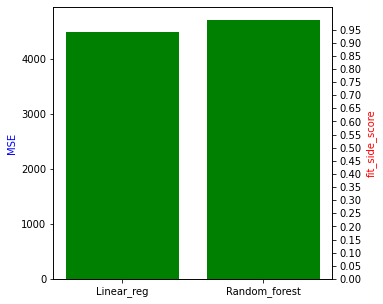

In [180]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.bar(x=['Linear_regression','Random_forest'],height=mse_bar)
plt.ylabel('MSE',color='b')
ax2 = ax.twinx()
ax2.bar(x=['Linear_reg','Random_forest'],height=score_bar,color='g')
plt.yticks(np.arange(0,1,.05))
plt.ylabel('fit_side_score',color='r')
plt.show()

Clearly **Random forest model is the winner** in determining most accurately. 